In [52]:
from micrograd.value import Value
%matplotlib inline


In [53]:
from graphviz import Digraph
def trace(value):
    """
    Traces the computation graph of the given value.
    Returns a list of nodes in the graph.
    """
    nodes, edges = set(), set()
    def build(v):
        if v not in nodes:
            nodes.add(v)
            for child in v._prev:
                edges.add((child, v))
                build(child)
    build(value)
    return nodes, edges

def draw_node(value):
    """
    Draws the computation graph of the given value using Flowgiston.
    Returns a Flowgiston object.
    """
    nodes, edges = trace(value)
    dot = Digraph(comment='Computation Graph', format='svg')
    for node in nodes:
        label = f"{node._label}|data:{node.data:.2f}|grad:{node.grad:.2f}"
        dot.node(str(id(node)), label=label, shape='record')
    for src, dst in edges:
        dot.edge(str(id(src)), str(id(dst)))
    return dot

In [54]:
a = Value(2.0); a._label = 'a'
b = Value(3.0); b._label = 'b'
c = Value(4.0); c._label = 'c'
d = a * b; d._label = 'd'
e =  c + d ; e._label = 'e'


In [49]:
e.backward()

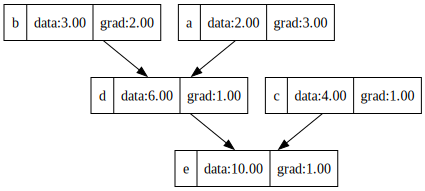

In [ ]:
draw_node(e)

Lets create a simple preceptron using the back propagation. The preceptron formula is:
```
y = xW+b 
```

In [ ]:
# inputs
x1 = Value(2.0); x1._label = 'x1'
x2 = Value(0.0); x2._label = 'x2'

# weights
w1 = Value(-3.0); w1._label = 'w1'
w2 = Value(1.0); w2._label = 'w2'

# bias
b = Value(1.0); b._label = 'b'

# forward pass 
x1w1 = x1 * w1; x1w1._label = 'x1w1'
x2w2 = x2 * w2; x2w2._label = 'x2w2'
x1w1x2w2 = x1w1 + x2w2; x1w1x2w2._label = 'x1w1x2w2'
y = x1w1x2w2 + b; y._label = 'y'

# non linearity
o = y.tanh(); o._label = 'o'

# calculate the gradients with respect to the output
# For example: da/de = da/dd * dd/de = b * 1 = b
o.backward()


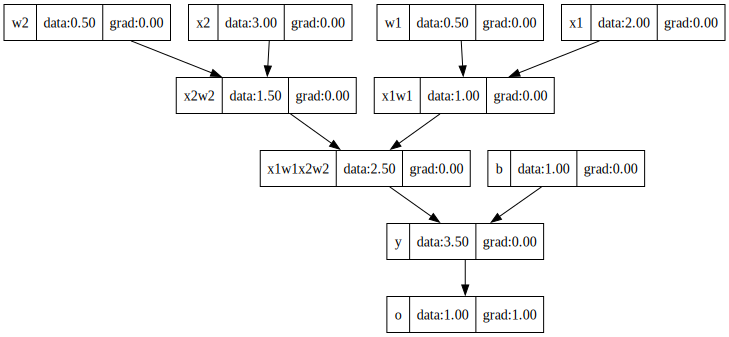

In [57]:
draw_node(o)